In [15]:
#Import libraries
import os
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform

In [2]:
os.getcwd()

'C:\\Users\\on846\\Downloads\\Edwisor notes\\Project_1\\Project details'

In [4]:
os.chdir("C:\\Users\\on846\\Downloads\\Edwisor notes\\Project_2\\project details")

In [5]:
df = pd.read_excel("Absenteeism_at_work_Project.xls")

In [6]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [7]:
################### Exploratory data Analysis######################################

cont_var = ['Transportation expense','Distance from Residence to Work','Service time','Age','Hit target','Work load Average/day ','Weight','Height','Body mass index','Absenteeism time in hours']
cat_var = ['ID','Reason for absence','Month of absence','Day of the week','Seasons','Disciplinary failure','Education','Son','Social drinker','Social smoker','Pet']

In [8]:
# Missing value analysis

#Create dataframe with missing percentage
missing_val = pd.DataFrame(df.isnull().sum())

#Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(df))*100

#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

#save output results 
missing_val.to_csv("Miising_perc.csv", index = False)

In [9]:
## imputation method

#Impute with median
df = df.fillna(df.median())

In [1]:
df.isnull().sum()

NameError: name 'df' is not defined

In [23]:
# Now we will skip outliers as data is less and we have implemented (outlier analysis) in R so we will check the accuracy of our model
#by not doing outlier analysis and check the model

############################# Feature selection###################################

### Correlation Analysis:

##Correlation analysis
#Correlation plot
df_corr = df.loc[:,cont_var]

In [25]:
df_corr

,Transportation expense,Distance from Residence to Work,Service time,Age,Hit target,Work load Average/day,Weight,Height,Body mass index,Absenteeism time in hours
0,289.0,36.0,13.0,33.0,97.0,239554.0,90.0,172.0,30.0,4.0
1,118.0,13.0,18.0,50.0,97.0,239554.0,98.0,178.0,31.0,0.0
2,179.0,51.0,18.0,38.0,97.0,239554.0,89.0,170.0,31.0,2.0
3,279.0,5.0,14.0,39.0,97.0,239554.0,68.0,168.0,24.0,4.0
4,289.0,36.0,13.0,33.0,97.0,239554.0,90.0,172.0,30.0,2.0
5,179.0,51.0,18.0,38.0,97.0,239554.0,89.0,170.0,31.0,3.0
6,225.0,52.0,3.0,28.0,97.0,239554.0,80.0,172.0,27.0,8.0
7,260.0,50.0,11.0,36.0,97.0,239554.0,65.0,168.0,23.0,4.0
8,155.0,12.0,14.0,34.0,97.0,239554.0,95.0,196.0,25.0,40.0
9,235.0,11.0,14.0,37.0,97.0,239554.0,88.0,172.0,29.0,8.0


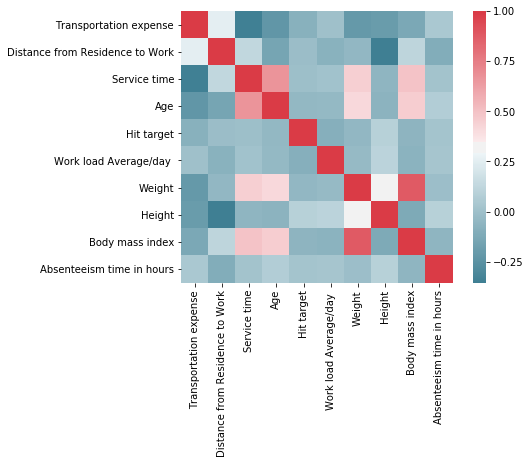

In [30]:
#Set the width and height of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [31]:
## Weight and Body mass index are negatively correlated to each other so we will drop weight variable..

df = df.drop(['Weight'], axis=1)

In [32]:
df.shape

(740, 20)

In [33]:
## Now we have 20 variables and 740 observations in the bag..

cont_var = ['Transportation expense','Distance from Residence to Work','Service time','Age','Hit target','Work load Average/day ','Height','Body mass index','Absenteeism time in hours']
cat_var = ['ID','Reason for absence','Month of absence','Day of the week','Seasons','Disciplinary failure','Education','Son','Social drinker','Social smoker','Pet']

(array([124., 155., 132.,  67.,   0.,   1., 199.,   0.,   0.,   0.,   0.,
          0.,  19.,   0.,   0.,   0.,   0.,   0.,  16.,   0.,   0.,   0.,
          0.,   0.,   5.,   0.,   0.,   0.,   0.,   0.,   7.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,
          0.,   0.,   0.,   0.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   3.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,
          0.,   0.,   3.]),
 array([  0.        ,   1.31868132,   2.63736264,   3.95604396,
          5.27472527,   6.59340659,   7.91208791,   9.23076923,
         10.54945055,  11.86813187,  13.18681319,  14.50549451,
         15.82417582,  17.14285714,  18.46153846,  19.78021978,
         21.0989011 ,  22.41758242,  23.73626374,  25.05494505,
         26.37362637,  27.69230769,  29.01098901,  30.329670

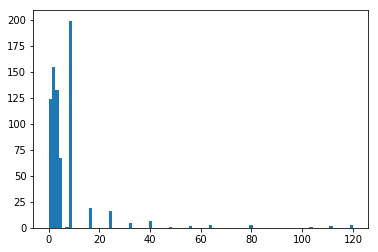

In [37]:
#Normality check
%matplotlib inline  
plt.hist(df['Absenteeism time in hours'], bins='auto')

In [38]:
#Nomalisation
for i in cont_var:
    print(i)
    df[i] = (df[i] - min(df[i]))/(max(df[i]) - min(df[i]))

Transportation expense
Distance from Residence to Work
Service time
Age
Hit target
Work load Average/day 
Height
Body mass index
Absenteeism time in hours


In [39]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.0,1.0,2.0,1.0,0.0,1.0,0.272727,0.578947,0.033333
1,36,0.0,7.0,3,1,0.000000,0.170213,0.607143,0.741935,0.194471,0.842105,1.0,1.0,1.0,1.0,0.0,0.0,0.454545,0.631579,0.000000
2,3,23.0,7.0,4,1,0.225926,0.978723,0.607143,0.354839,0.194471,0.842105,0.0,1.0,0.0,1.0,0.0,0.0,0.212121,0.631579,0.016667
3,7,7.0,7.0,5,1,0.596296,0.000000,0.464286,0.387097,0.194471,0.842105,0.0,1.0,2.0,1.0,1.0,0.0,0.151515,0.263158,0.033333
4,11,23.0,7.0,5,1,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.0,1.0,2.0,1.0,0.0,1.0,0.272727,0.578947,0.016667


In [40]:
# Now our dataset is normalised so w will divide our data into train and test for further model developement..

###################################### MODEL DEVELOPEMENT####################################################################


In [41]:
##Decision tree:

from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

C:\Users\on846\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [42]:
train, test = train_test_split(df, test_size=0.2)

In [43]:
train.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Height,Body mass index,Absenteeism time in hours
244,18,1.0,7.0,3,1,0.785185,0.234043,0.107143,0.032258,0.401204,0.894737,0.0,2.0,0.0,0.0,0.0,0.0,0.575758,0.315789,0.066667
7,20,23.0,7.0,6,1,0.525926,0.957447,0.357143,0.290323,0.194471,0.842105,0.0,1.0,4.0,1.0,0.0,0.0,0.151515,0.210526,0.033333
583,3,27.0,1.0,5,2,0.225926,0.978723,0.607143,0.354839,0.622171,0.789474,0.0,1.0,0.0,1.0,0.0,0.0,0.212121,0.631579,0.025000
724,12,22.0,6.0,4,1,0.425926,0.978723,0.000000,0.129032,0.399914,0.789474,0.0,2.0,1.0,1.0,0.0,8.0,0.454545,0.105263,0.025000
326,1,18.0,11.0,4,4,0.433333,0.127660,0.464286,0.322581,0.451612,0.842105,0.0,3.0,1.0,0.0,0.0,1.0,0.272727,0.526316,0.008333


In [44]:
train.shape

(592, 20)

In [45]:
test.shape

(148, 20)

In [46]:
#Decision tree for regression
fit_DT = DecisionTreeRegressor(max_depth=2).fit(train.iloc[:,0:19], train.iloc[:,19])

In [48]:
fit_DT

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [49]:
#Apply model on test data
predictions_DT = fit_DT.predict(test.iloc[:,0:19])

In [50]:
predictions_DT

array([0.10926375, 0.10926375, 0.02756008, 0.10926375, 0.02756008,
       0.02756008, 0.02756008, 0.02756008, 0.00405405, 0.05222222,
       0.05222222, 0.10926375, 0.10926375, 0.10926375, 0.10926375,
       0.10926375, 0.02756008, 0.02756008, 0.02756008, 0.02756008,
       0.02756008, 0.02756008, 0.05222222, 0.00405405, 0.10926375,
       0.02756008, 0.02756008, 0.10926375, 0.10926375, 0.10926375,
       0.02756008, 0.10926375, 0.02756008, 0.10926375, 0.00405405,
       0.05222222, 0.02756008, 0.02756008, 0.10926375, 0.02756008,
       0.10926375, 0.02756008, 0.02756008, 0.10926375, 0.02756008,
       0.02756008, 0.02756008, 0.02756008, 0.02756008, 0.00405405,
       0.10926375, 0.02756008, 0.02756008, 0.02756008, 0.02756008,
       0.02756008, 0.02756008, 0.02756008, 0.10926375, 0.10926375,
       0.10926375, 0.02756008, 0.10926375, 0.10926375, 0.10926375,
       0.02756008, 0.10926375, 0.02756008, 0.10926375, 0.10926375,
       0.05222222, 0.02756008, 0.02756008, 0.02756008, 0.02756

In [51]:
from sklearn.metrics import mean_squared_error
from math import sqrt


In [52]:
rmse = sqrt(mean_squared_error(test.iloc[:,19], predictions_DT))### overall

In [53]:
rmse

0.12169236795930584

In [ ]:
## we will make an note of RMSE here..

## RMSE (overall) = 0.12

In [56]:
######################################### ## Linear Regression#######################################

#Import libraries for LR
import statsmodels.api as sm

In [57]:
# Train the model using the training sets
model = sm.OLS(train.iloc[:,19], train.iloc[:,0:19]).fit()

In [58]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Absenteeism time in hours   R-squared:                       0.290
Model:                                   OLS   Adj. R-squared:                  0.267
Method:                        Least Squares   F-statistic:                     12.33
Date:                       Mon, 11 Feb 2019   Prob (F-statistic):           4.71e-32
Time:                               05:18:30   Log-Likelihood:                 513.96
No. Observations:                        592   AIC:                            -989.9
Df Residuals:                            573   BIC:                            -906.6
Df Model:                                 19                                         
Covariance Type:                   nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
ID                                  0.0008      0.000      1.605      0.109      -0.000       0.002
Reason for absence                 -0.0029      0.001     -4.896      0.000      -0.004      -0.002
Month of absence                    0.0025      0.002      1.653      0.099      -0.000       0.005
Day of the week                    -0.0047      0.003     -1.506      0.133      -0.011       0.001
Seasons                            -0.0005      0.004     -0.113      0.910      -0.009       0.008
Transportation expense              0.0313      0.021      1.458      0.145      -0.011       0.073
Distance from Residence to Work    -0.0153      0.020     -0.755      0.451      -0.055       0.025
Service time                        0.0412      0.047      0.878      0.380      -0.051       0.133
Age                                 0.0101      0.033      0.304      0.761      -0.055       0.075
Work load Average/day               0.0137      0.020      0.682      0.496      -0.026       0.053
Hit target                          0.0623      0.023      2.759      0.006       0.018       0.107
Disciplinary failure               -0.1149      0.023     -5.096      0.000      -0.159      -0.071
Education                           0.0041      0.007      0.567      0.571      -0.010       0.018
Son                                 0.0076      0.005      1.688      0.092      -0.001       0.016
Social drinker                      0.0233      0.014      1.696      0.090      -0.004       0.050
Social smoker                   -3.856e-06      0.018     -0.000      1.000      -0.035       0.035
Pet                                -0.0011      0.004     -0.277      0.782      -0.009       0.007
Height                              0.0287      0.028      1.017      0.310      -0.027       0.084
Body mass index                    -0.0037      0.026     -0.143      0.886      -0.055       0.048
==============================================================================
Omnibus:                      663.635   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35893.138
Skew:                           5.403   Prob(JB):                         0.00
Kurtosis:                      39.584   Cond. No.                         369.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
# make the predictions by the model
predictions_LR = model.predict(test.iloc[:,0:19]) 

In [60]:
rmse = sqrt(mean_squared_error(test.iloc[:,19], predictions_LR))### overall

In [61]:
rmse

0.11988766884173091

In [ ]:
##RMSE = 0.12

In [63]:
#################################################Random forest #####################################################

from sklearn.ensemble import RandomForestRegressor

C:\Users\on846\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [64]:
##Random forest for regression model

fit_RF = RandomForestRegressor(max_depth=2).fit(train.iloc[:,0:19], train.iloc[:,19])

In [65]:
#Apply model on test data
predictions_RF = fit_RF.predict(test.iloc[:,0:19])

In [66]:
#Calculate RMSE

rmse = sqrt(mean_squared_error(test.iloc[:,19], predictions_RF))### overall

In [67]:
rmse

0.10826367875917142

In [ ]:
##RMSE = 0.11 (overall)

#### Hence we will apply Random forest algorithm for prediction...


##Thanks..